Saving milti data 1 utf.csv to milti data 1 utf (5).csv


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
324/324 [==============================] - 214s 504ms/step - loss: 2.1544 - accuracy: 0.4429 - val_loss: 1.0314 - val_accuracy: 0.8696
Epoch 2/3
324/324 [==============================] - 160s 494ms/step - loss: 0.5631 - accuracy: 0.9524 - val_loss: 0.1958 - val_accuracy: 0.9961
Epoch 3/3
81/81 [==============================] - 15s 147ms/step
BERT Model Performance:
               precision    recall  f1-score   support

       	Anger       1.00      1.00      1.00        35
        	Fear       1.00      1.00      1.00        38
         	Joy       1.00      1.00      1.00        32
     	Sadness       1.00      1.00      1.00        36
    	Surprise       1.00      1.00      1.00        23
    Admiratio       1.00      1.00      1.00        26
      Alegría       1.00      1.00      1.00        24
        Angst       1.00      1.00      1.00         3
       Colère       1.00      1.00      1.00        35
        Enojo       1.00      1.00      1.00        36
       Freude 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


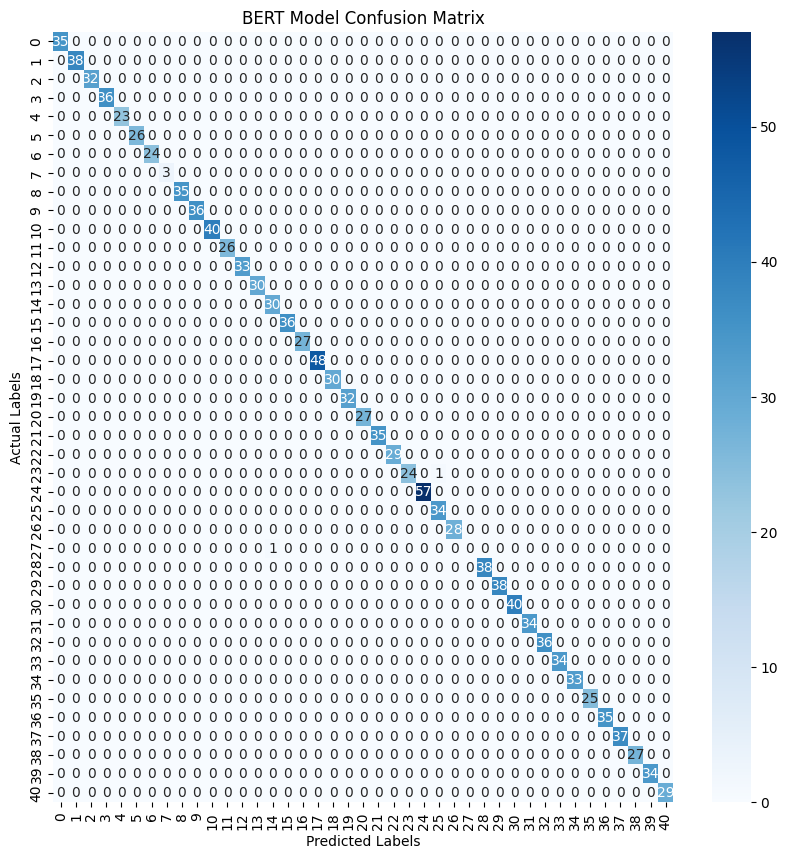

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


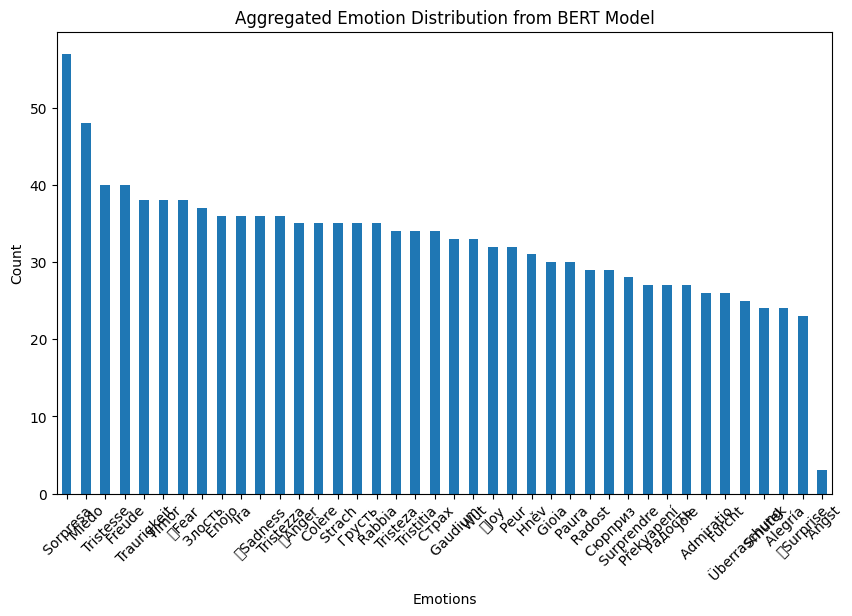

SVM Model Performance:
               precision    recall  f1-score   support

       	Anger       1.00      1.00      1.00        35
        	Fear       1.00      1.00      1.00        38
         	Joy       1.00      1.00      1.00        32
     	Sadness       1.00      1.00      1.00        36
    	Surprise       1.00      1.00      1.00        23
    Admiratio       1.00      1.00      1.00        26
      Alegría       1.00      1.00      1.00        24
        Angst       1.00      1.00      1.00         3
       Colère       1.00      1.00      1.00        35
        Enojo       1.00      1.00      1.00        36
       Freude       1.00      1.00      1.00        40
       Furcht       1.00      1.00      1.00        26
      Gaudium       1.00      1.00      1.00        33
        Gioia       1.00      1.00      1.00        30
         Hněv       1.00      1.00      1.00        30
          Ira       1.00      1.00      1.00        36
         Joie       1.00      1.00      1

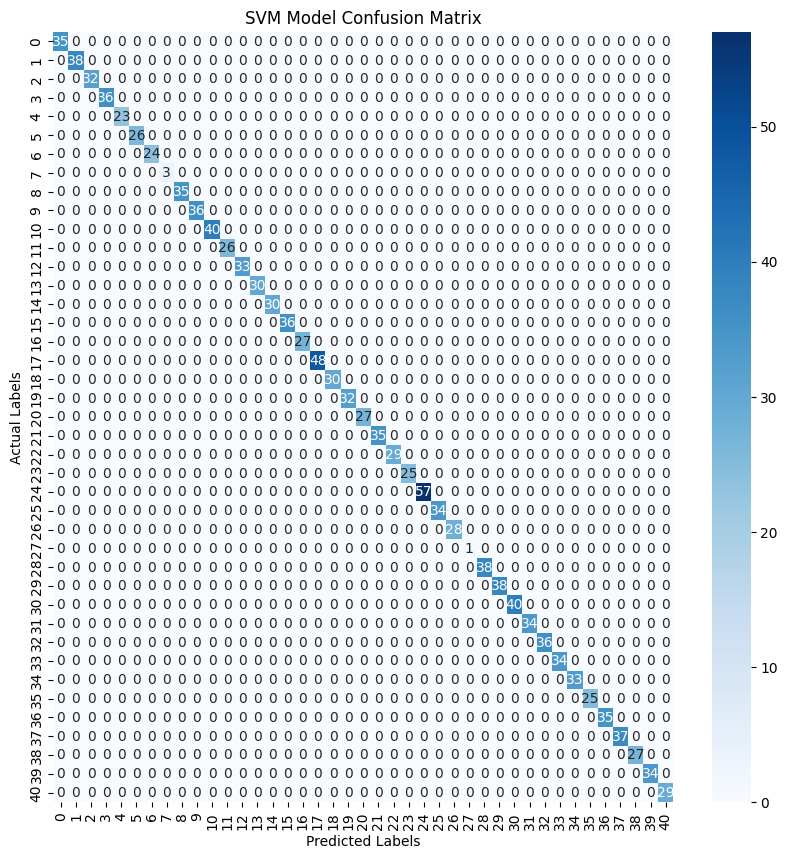

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


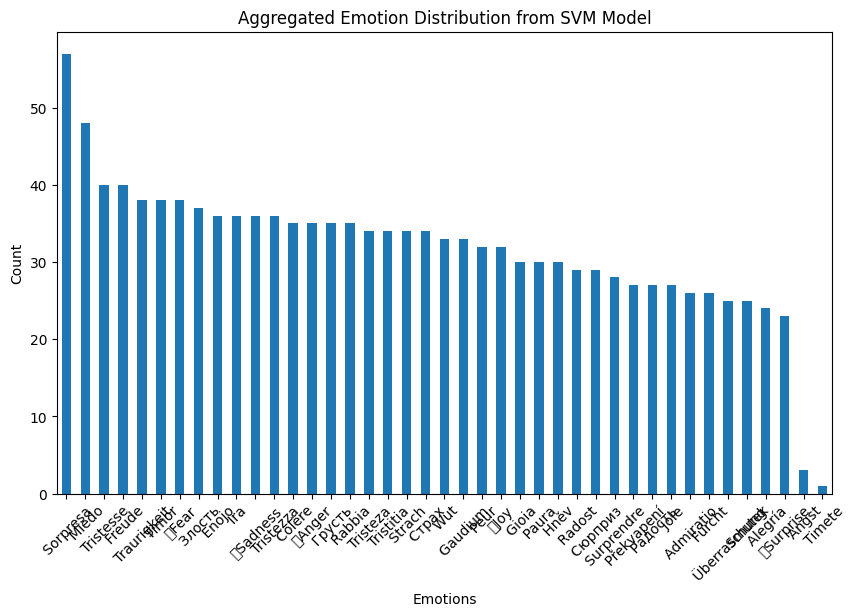

In [6]:
# ..........................................................INFORMATION RETRIEVAL AND WEB SEARCH................................................................................
# .........................................................MULTILINGUAL EMOTION DETECTION USING NLP............................................................................
# ........................................................................BY......................................................................................................
# ...........................................................AKHIL KRISHNA DULIKATTA............................................................................................

# Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Load and preprocess the dataset
uploaded = files.upload()
file_name = next(iter(uploaded))
data = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Mapping of emotions from various languages to English
emotion_mapping = {
    'Hněv': 'Anger', 'Překvapení': 'Surprise', 'Radost': 'Joy', 'Smutek': 'Sadness', 'Strach': 'Fear',
    'Colère': 'Anger', 'Joie': 'Joy', 'Peur': 'Fear', 'Surprendre': 'Surprise', 'Tristesse': 'Sadness',
    'Angst': 'Fear', 'Freude': 'Joy', 'Furcht': 'Fear', 'Traurigkeit': 'Sadness', 'Überraschung': 'Surprise', 'Wut': 'Anger',
    'Gioia': 'Joy', 'Paura': 'Fear', 'Rabbia': 'Anger', 'Sorpresa': 'Surprise', 'Tristezza': 'Sadness',
    'Admiratio': 'Admiration', 'Gaudium': 'Joy', 'Ira': 'Anger', 'Timete': 'Fear', 'Timor': 'Fear', 'Tristitia': 'Sadness',
    'Грусть': 'Sadness', 'Злость': 'Anger', 'Радость': 'Joy', 'Страх': 'Fear', 'Сюрприз': 'Surprise',
    'Alegría': 'Joy', 'Enojo': 'Anger', 'Miedo': 'Fear', 'Sorpresa': 'Surprise', 'Tristeza': 'Sadness',
}

# Translate emotions to English
data['emotion_in_english'] = data['emotion'].map(emotion_mapping).fillna(data['emotion'])

# Encoding labels for emotions
label_encoder = LabelEncoder()
data['encoded_emotion'] = label_encoder.fit_transform(data['emotion_in_english'])
num_classes = data['encoded_emotion'].nunique()

# BERT Tokenizer initialization
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

def convert_example_to_feature(text):
    """Converts text data into BERT-compatible features."""
    return tokenizer.encode_plus(text,
                                 add_special_tokens=True,
                                 max_length=128,
                                 pad_to_max_length=True,
                                 truncation=True,
                                 return_attention_mask=True)

def map_example_to_dict(input_ids, attention_masks, label):
    """Maps examples to the format expected by BERT."""
    return {
        "input_ids": input_ids,
        "attention_mask": attention_masks,
    }, label

def encode_examples(ds, limit=-1):
    """Encodes a given dataset into BERT-compatible format."""
    input_ids = []
    attention_masks = []
    labels = []

    for index, row in ds.iterrows():
        bert_input = convert_example_to_feature(row['sentence'])
        input_ids.append(bert_input['input_ids'])
        attention_masks.append(bert_input['attention_mask'])
        labels.append(row['encoded_emotion'])

    return tf.data.Dataset.from_tensor_slices((input_ids, attention_masks, labels)).map(map_example_to_dict)

# Splitting the dataset
train, test = train_test_split(data, test_size=0.2)
batch_size = 16  # Reduced batch size to manage memory
train_data = encode_examples(train).shuffle(100).batch(batch_size)
test_data = encode_examples(test).batch(batch_size)

# BERT Model Configuration
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=num_classes)

# Compile the BERT model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the BERT model
model.fit(train_data, epochs=3, validation_data=test_data)

# SVM Model training for comparison
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(train['sentence'])
X_test_tfidf = tfidf.transform(test['sentence'])

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, train['encoded_emotion'])

# Evaluation and Visualization functions
def plot_confusion_matrix(y_true, y_pred, title, label_encoder):
    """Plots a confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Actual Labels')
    plt.xlabel('Predicted Labels')
    plt.show()

def plot_aggregated_emotion_distribution(y_pred, title, label_encoder):
    """Plots the aggregated distribution of predicted emotions."""
    emotions = label_encoder.inverse_transform(y_pred)
    emotion_counts = pd.Series(emotions).value_counts()
    emotion_counts.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Count')
    plt.xlabel('Emotions')
    plt.xticks(rotation=45)
    plt.show()

# Evaluate and visualize BERT Model results
y_pred_bert = model.predict(test_data).logits
y_pred_bert = np.argmax(y_pred_bert, axis=1)
y_true_bert = np.concatenate([y.numpy() for x, y in test_data], axis=0)

print("BERT Model Performance:")
unique_labels_bert = np.unique(np.concatenate([y_true_bert, y_pred_bert]))
print(classification_report(y_true_bert, y_pred_bert, target_names=label_encoder.inverse_transform(unique_labels_bert)))
plot_confusion_matrix(y_true_bert, y_pred_bert, "BERT Model Confusion Matrix", label_encoder)
plot_aggregated_emotion_distribution(y_pred_bert, "Aggregated Emotion Distribution from BERT Model", label_encoder)

# Evaluate and visualize SVM Model results
y_pred_svm = svm_model.predict(X_test_tfidf)

print("SVM Model Performance:")
unique_labels_svm = np.unique(np.concatenate([test['encoded_emotion'], y_pred_svm]))
print(classification_report(test['encoded_emotion'], y_pred_svm, target_names=label_encoder.inverse_transform(unique_labels_svm)))
plot_confusion_matrix(test['encoded_emotion'], y_pred_svm, "SVM Model Confusion Matrix", label_encoder)
plot_aggregated_emotion_distribution(y_pred_svm, "Aggregated Emotion Distribution from SVM Model", label_encoder)
